
# CNN Bunny v Puppy

This originally came come the [John Chibuk medium post](https://medium.freecodecamp.org/learn-to-build-a-convolutional-neural-network-on-the-web-with-this-easy-tutorial-2d617ffeaef3). To use this and the supporting libraries, fork [his repo](https://github.com/chibuk/simple-cnn-keras-colaboratory/tree/master). 

This guide is meant to be a simple tutorial which lets you take images classes, train a model with tensorflow and then predict a new image with your "intelligent" model.

Here is further explanation in a short medium post: https://medium.com/@chibuk/machine-learning-for-the-everyday-person-part-3-your-first-neural-network-744528595c65

### Objective
___Build a Convolutional Neural Network (CNN) to detect between two image types: bunny or a puppy___


In [5]:
# STEP 1
import os
os.chdir("./")

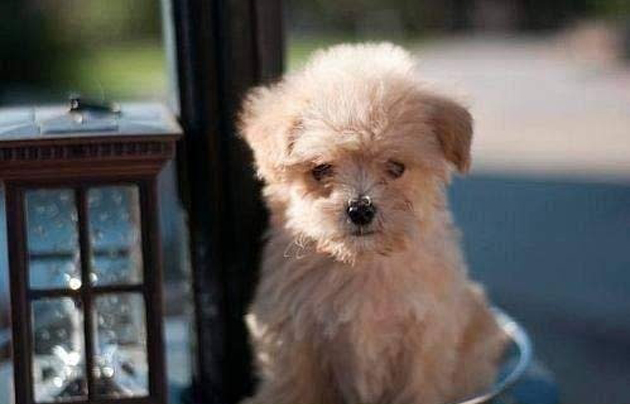

In [6]:
# STEP 2
img_folder = 'images'

#1. Get sample file
#2. Read image and display
from IPython.display import Image
Image("Cute-puppy-photos-82.jpg")

In [7]:
# STEP 3
# This cell contains all the references to libraries that are needed to train a convolutional neural network
from __future__ import print_function, division

import numpy as np
import random
import os
import glob


import cv2
import datetime
import pandas as pd
import time
import h5py
import csv

from scipy.misc import imresize, imsave

from sklearn.cross_validation import KFold, train_test_split
from sklearn.metrics import log_loss, confusion_matrix
from sklearn.utils import shuffle

from PIL import Image, ImageChops, ImageOps

import matplotlib.pyplot as plt

from keras import backend as K
from keras.callbacks import EarlyStopping, Callback
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras import optimizers
from keras.models import Sequential, model_from_json
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, Activation, Dropout, Flatten, Dense


E: Could not open lock file /var/lib/dpkg/lock - open (13: Permission denied)
E: Unable to lock the administration directory (/var/lib/dpkg/), are you root?


/home/redne/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/redne/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


Image Classifier Code from: https://github.com/pranavj1001/Image-Classification/blob/master/CNN_Classification.py

For tips on how to set the number of epochs, steps per epoch and validation size
Please read this https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network

The model below has been lowered to reduce the runtime of the training process given ~100 images in your training class



In [ ]:
# STEP 4
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
# make 32 feature detectors with a size of 3x3
# choose the input-image's format to be 64x64 with 3 channels
classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation="relu"))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(activation="relu", units=128))
classifier.add(Dense(activation="sigmoid", units=1))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# use ImageDataGenerator to preprocess the data
from keras.preprocessing.image import ImageDataGenerator

# augment the data that we have
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

# prepare training data
training_data = train_datagen.flow_from_directory('./images/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

# prepare test data
test_data = test_datagen.flow_from_directory('./images/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

# finally start computation
# to improve the model accuracy you can increase the number of steps_per_epoch to e.g. 8000
# increase the number of epochs to 5-25
# increase the validation steps
# this parametters allow for the model to optimize

classifier.fit_generator(training_data,
                         steps_per_epoch = (4000 / 32),
                         epochs = 2,
                         validation_data = test_data,
                         validation_steps = 2000)

Found 152 images belonging to 2 classes.
Found 23 images belonging to 2 classes.
Epoch 1/2
124/125 [============================>.] - ETA: 0s - loss: 0.5006 - acc: 0.7454

[[1.]]
puppy


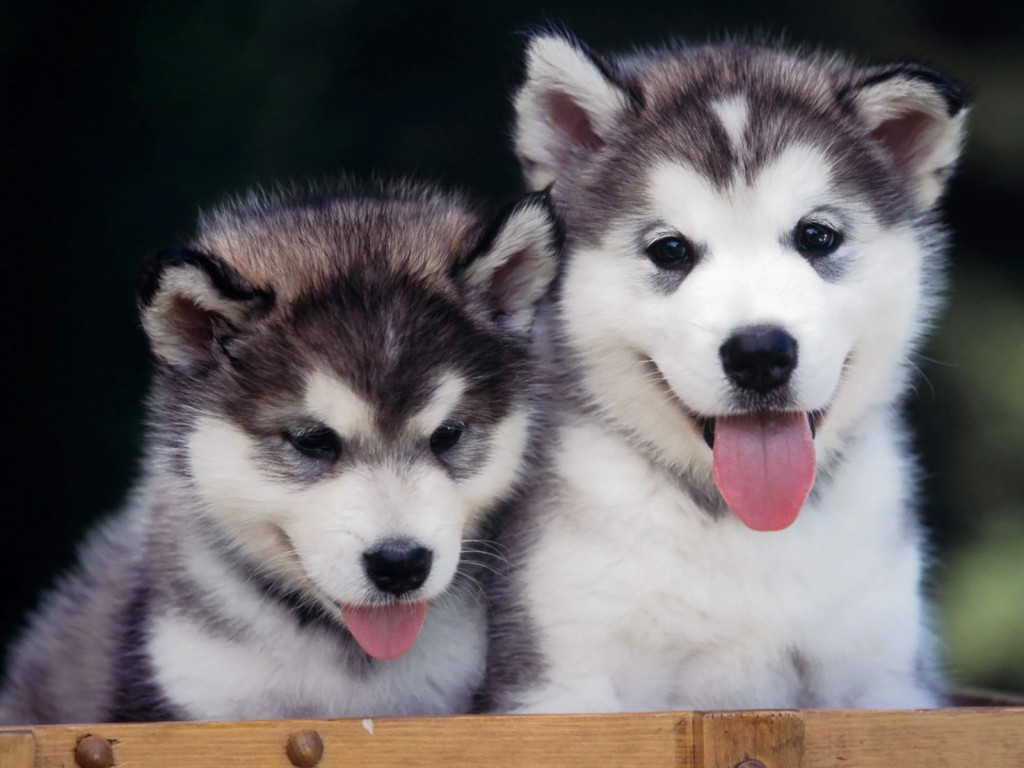

In [19]:
# STEP 10

from IPython.display import Image
new_img_to_load = './newimages/puppy1.jpg'

# to make predictions
import numpy as np
from keras.preprocessing import image
test_image = image.load_img(new_img_to_load, target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
# training_set.class_indices
if result[0][0] == 1:
    prediction = 'puppy'
else:
    prediction = 'bunny'


print(result)
print(prediction)
Image(new_img_to_load)